<h2 style="text-align:center;">Logistic Regression - Basic Classification</h2>

In this notebook, we will implement **Logistic Regression** for a binary classification task.
- Dataset: Social network ads dataset (Age & Salary → Purchase Decision)
- Goal: Predict if a user will buy the car (1 = Yes, 0 = No)
- Steps:
  1. Load & preprocess dataset
  2. Train Logistic Regression model
  3. Evaluate with confusion matrix & metrics
  4. Visualize decision boundary for training & test set

In [1]:
# ➤ Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

<h2 style="text-align:center;">Step 1: Load Dataset</h2>

In [2]:
df = pd.read_csv("../data/logistic_classification.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<h2 style="text-align:center;">Step 2: Feature Selection & Train-Test Split</h2>

In [3]:
X = df.iloc[:, [2,3]].values  # Age & Estimated Salary
y = df.iloc[:, -1].values     # Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h2 style="text-align:center;">Step 3: Feature Scaling</h2>

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2 style="text-align:center;">Step 4: Train Logistic Regression Model</h2>

In [5]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

<h2 style="text-align:center;">Step 5: Evaluation Metrics</h2>

In [6]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", ac)
print("\nClassification Report:\n", cr)

bias = classifier.score(X_train, y_train)
variance = classifier.score(X_test, y_test)
print("\nBias (Train Accuracy):", bias)
print("Variance (Test Accuracy):", variance)

Confusion Matrix:
 [[57  1]
 [ 5 17]]

Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80


Bias (Train Accuracy): 0.821875
Variance (Test Accuracy): 0.925


<h2 style="text-align:center;">Step 6: Visualizations</h2>

C:\Users\MUBASSHIR\AppData\Local\Temp\ipykernel_15052\2837673186.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


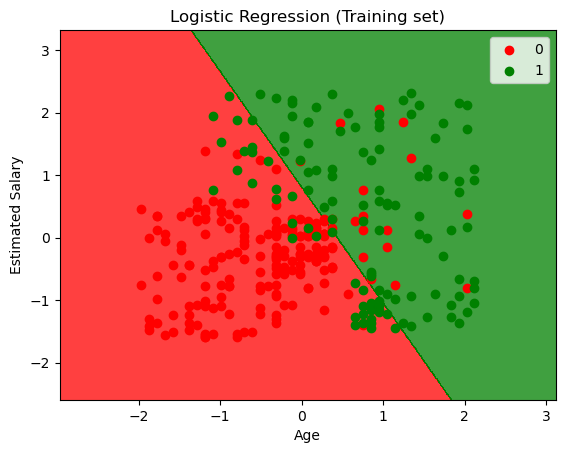

C:\Users\MUBASSHIR\AppData\Local\Temp\ipykernel_15052\2837673186.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


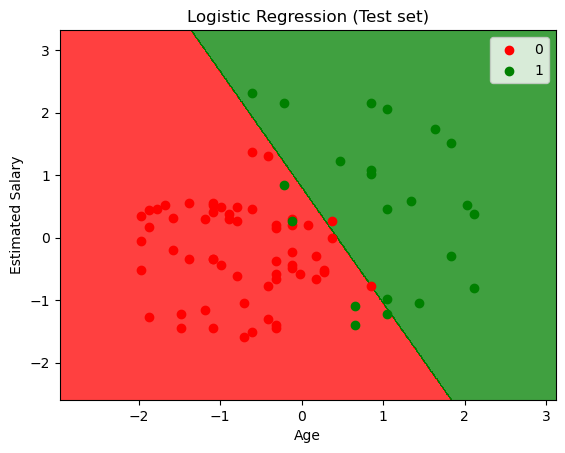

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
        np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01)
    )
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red','green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                    c=ListedColormap(('red','green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Training set visualization
plot_decision_boundary(X_train, y_train, 'Logistic Regression (Training set)')

# Test set visualization
plot_decision_boundary(X_test, y_test, 'Logistic Regression (Test set)')

### ✅ Summary

- Logistic Regression is used for **binary classification**.  
- It predicts probabilities using the **sigmoid function**.  
- Decision boundary is **linear** (straight line in 2D).  
- Evaluated using **confusion matrix, accuracy, classification report, ROC curve**.  
- Works well when classes are linearly separable.  

Next: We will extend this into **Logistic Regression with PCA** to handle higher dimensions.